# Introdução

Este projeto tem como objetivo analisar o conjunto de dados 'World Population', que traz dados sobre a população mundial como o número de habitantes em alguns anos, densidade populacional e o continente em que o mesmo está localizado. Além da análise dos dados, é de interesse treinar e aprimorar a utilização de gráficos em Python.  

O dataset foi retirado do site [Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset), e tem como base um censo feito pelo [Departamento de Censo dos Estados Unidos](https://www.census.gov/) em 2019 e faz algumas estimativas para os anos seguintes baseados nos dados da ONU. 

Algumas perguntas que pretendem ser respondidas neste projeto:

- Quais os 10 países mais populosos do mundo? Houveram mudanças nessas posições nos últimos anos?
- Como é dada a relação da área do território e população? 
- Como é a tendência de crescimento populacional por continente?
- O fenômeno de diminuição da população: identificar os países em que acontece esse fato e tentar entender causas e consequências através de outras referências. 



## Importação de Bibliotecas e Importação de Dados

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import slope

pop_df = pd.read_csv('world_population.csv')
pop_df.head()
pop_df.info()


ModuleNotFoundError: No module named 'slope'

Temos então 16 variáveis e 234 países e nenhuma linha com dados faltantes. 

## Vamos observar os 5 países mais populosos e a distribuição de população por continente.

In [26]:
# Lista dos 10 países mais populosos do mundo

#print(pop_df.sort_values('Rank').head(10))

# Vamos como este ranking se comporta ao longo do tempo:

# Criar um df auxiliar para ver quantos países aparecem no top 10 em todos os anos

count_df = pop_df.iloc[:, 5:13]
count_df['Country'] = pop_df['Country/Territory']
display(count_df.head())

# Como desejamos ver o comportamento sobre o tempo, é intuitivo que o tempo "avance" da esquerda para direita

count_df = count_df.iloc[:, ::-1]
count_df.info()

meu_dicionario = count_df.set_index('Country').T.to_dict('list')


plt.figure(figsize=(10, 5))
bumpchart(meu_dicionario, show_rank_axis=True, scatter=True, holes=False,
          line_args={"linewidth": 5, "alpha": 0.5}, scatter_args={"s": 100, "alpha": 0.8})  # bump chart class with nice examples can be found on github
plt.show()


,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Country
0,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,Afghanistan
1,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,Albania
2,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,Algeria
3,44273,46189,51368,54849,58230,47818,32886,27075,American Samoa
4,79824,77700,71746,71519,66097,53569,35611,19860,Andorra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          234 non-null    object
 1   1970 Population  234 non-null    int64 
 2   1980 Population  234 non-null    int64 
 3   1990 Population  234 non-null    int64 
 4   2000 Population  234 non-null    int64 
 5   2010 Population  234 non-null    int64 
 6   2015 Population  234 non-null    int64 
 7   2020 Population  234 non-null    int64 
 8   2022 Population  234 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 16.6+ KB


NameError: name 'bumpchart' is not defined

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 6 artists>

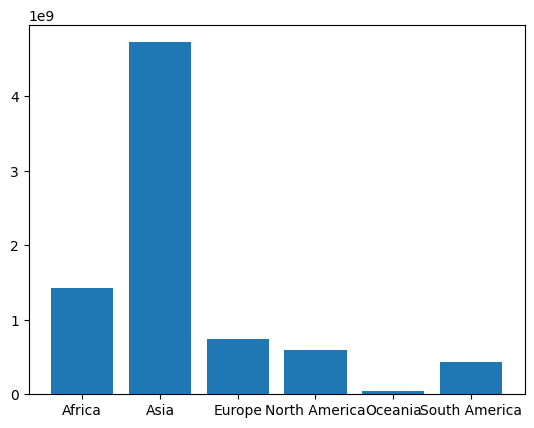

In [30]:
popcont = pop_df.groupby('Continent')['2022 Population'].sum()

print(popcont)

plt.bar( popcont.index, popcont.values)

# Melhorar o gráfico de barras